***
***
***

# BootCamp em Ciência de Dados 2 - Alura
Márcio Augusto Silva Gonçalves - marcius72@gmail.com - https://github.com/mago72
***
***

## Parte do Módulo 1 necessária ao Módulo 2
***
***

In [3]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
%matplotlib inline

***
### Análise de gastos hospitalares por mês/ano de **ATENDIMENTO / INTERNAÇÃO** e Unidades da Federação(UF) no Brasil: Datasus de jan/2008 a mar/2021
Com TabNet do DATASUS para baixar .CSV em http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

In [4]:
import pandas as pd

In [5]:
dados_sus = pd.read_csv('https://raw.githubusercontent.com/mago72/BootCamp-DataScience-Alura/main/Dados/datasus_internacao.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12,
                       thousands='.', decimal=',', engine='python')

In [6]:
pd.options.display.float_format='{:.2f}'.format

In [7]:
colunas_validas=dados_sus.mean().index

In [8]:
colunas_validas = dados_sus.mean().index.tolist()   #transformando o índice em lista para poder manipular
colunas_validas.insert(0, "Unidade da Federação") # 0 é a posição onde entra a coluna unidade da federação do DataFrame original

In [9]:
validas = dados_sus[colunas_validas]

In [10]:
validas = validas.set_index("Unidade da Federação")

In [11]:
validas.T.head()   # Função T para transpor o índice para as colunas e poder imprimir o gráfico corretamente

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [12]:
validas = validas.drop("Total", axis=1)    ## A função drop retira a linha Total e o axis=1 indica que o total está como Linha (axis=0 indicaria como coluna, se fosse o caso) 

In [13]:
validas['Total'] = validas.sum(axis=1)  ### Aqui atribuiu-se a uma nova coluna 'Total' ao DF especificando os valores dela sendo a soma das linhas . O Total aparece no final a direita. A atribuição por soma funcionou pq tem 27 valores, igual as linhas do data frame e é a soma de cada linha. Se tem alguma linha faltando, não funcionaria.

In [14]:
validas.sort_values('Total', ascending=False).head() # Em ordem de maior para o menor gasto (se ascending True ou ausente por default então é do menor para o maior)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,41386533231.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,20418205467.78
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,14681341476.16
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,12764274442.95
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,10337229379.18


In [15]:
ordenado_por_total = validas.sort_values('Total', ascending=False) 
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)

In [16]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [17]:
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,...,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
31 Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,...,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
33 Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,...,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


In [18]:
mes_mais_recente = ordenado_por_total.columns[-1]   # -1 pega o primeiro mes do final para o começo, ou seja o último no caso Março de 2021
mes_mais_recente

'2021/Mar'

In [19]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           177.41
31 Minas Gerais         79.78
41 Paraná               43.48
43 Rio Grande do Sul    37.80
33 Rio de Janeiro       49.15
Name: 2021/Mar, dtype: float64

<AxesSubplot:xlabel='Unidade da Federação'>

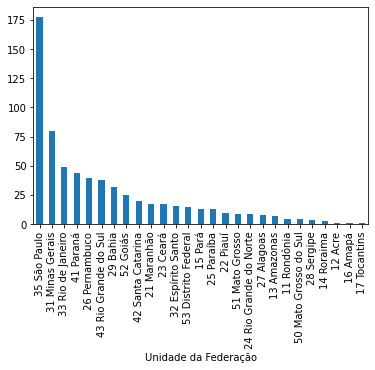

In [20]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)  # se usasse True ou mesmo nada o ordenamento seria ascendente do menor para o maior
gastos_do_mais_recente.plot(kind='bar')

## Módulo 2
Aprofundamento da análise dos dados financeiros do DataSUS
 - Tratamento, exploração e visualização de dados
 - Avance seus conhecimentos em Python e Pandas para analisar dados reais.
 - Crie gráficos estilizados com Seaborn
 - Aprenda como usar o pandas na manipulação dos seus dados.
 - Analise e explore os dados criando hipótese de forma analítica.
 - Crie visualizações e aprenda boas práticas.
 ***
 ***

### Aula 1 - Módulo 2 - Fontes externas, limpeza e manipulação de dados

***
#### Continuidade com a mesma base de dados de data/mês de atendimento/internação, importando-a via http do GitHub (vide importação do arquivo na Aula2 mod1 - modificando origem)


#### Trazendo novamente o gráfico final da Aula 5 mod.1:

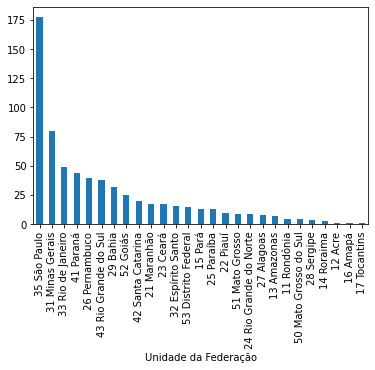

In [21]:
import matplotlib as mpl   # A função style parou de funcionar - Não funciona mais dentro de plt.style.use e sim agora direto dentro de mpl.style.use
import matplotlib.style

gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)  # se usasse True ou mesmo nada o ordenamento seria ascendente do menor para o maior
gastos_do_mais_recente.plot(kind='bar')
mpl.style.use('default')

#### Abaixo criar uma tabela de gastos proporcionais por Estado, onde poderá ser visto o % de cada um

In [22]:
gastos_do_mais_recente / gastos_do_mais_recente.sum()
# gastos_proporcionais.plot(kind='bar')

Unidade da Federação
35 São Paulo             0.27
31 Minas Gerais          0.12
33 Rio de Janeiro        0.08
41 Paraná                0.07
26 Pernambuco            0.06
43 Rio Grande do Sul     0.06
29 Bahia                 0.05
52 Goiás                 0.04
42 Santa Catarina        0.03
21 Maranhão              0.03
23 Ceará                 0.03
32 Espírito Santo        0.02
53 Distrito Federal      0.02
15 Pará                  0.02
25 Paraíba               0.02
22 Piauí                 0.01
51 Mato Grosso           0.01
24 Rio Grande do Norte   0.01
27 Alagoas               0.01
13 Amazonas              0.01
11 Rondônia              0.01
50 Mato Grosso do Sul    0.01
28 Sergipe               0.00
14 Roraima               0.00
12 Acre                  0.00
16 Amapá                 0.00
17 Tocantins             0.00
Name: 2021/Mar, dtype: float64

#### Vendo em um gráfico o % será da mesma forma do gráfico mais recente:

<AxesSubplot:xlabel='Unidade da Federação'>

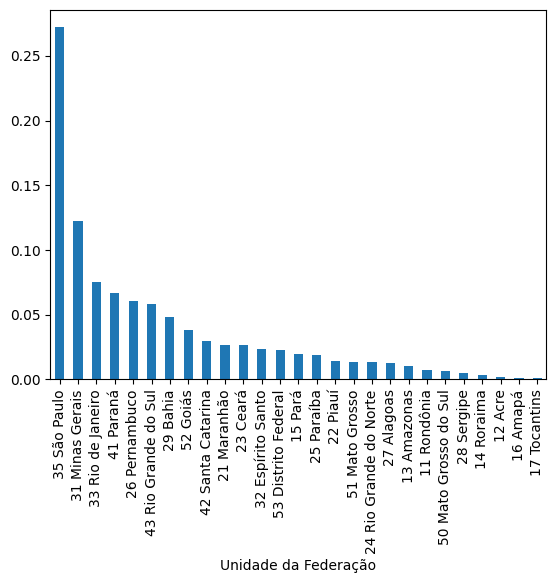

In [23]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

#### **Agora para melhor análise devemos usar a população brasileira para obter a porporção de gastos hospitalares por habitante**
*P.S. Já fiz uma solução nos desafios da Aula 5 mód.1, utilizando dados do IBGE do censo 2010 e da estimativa 2020, mas aqui será utilizado apenas o dado fixo da estimativa 2020

Em IBGE: https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados foi baixado o arquivo da estimativa (link é diferente do que usei, arquivo tem outro formato, porém os dados de população são os mesmos).
Arquivo **.XLS** foi baixado e exportado para o GitHub da Alura:

Será usado a função de ler o excel

In [24]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


Com o erro acima será instalado a dependencia de leitura: **xlrd** e rodar a leitura do excel novamente

In [25]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [26]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


#### A tabela acima poderá ser trabalhada, mas podemos pegar uma outra fonte de dados dessa tabela em página web: 

Do wikipedia em https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1 pode-se pegar esses mesmos dados de fonte do IBGE<br>
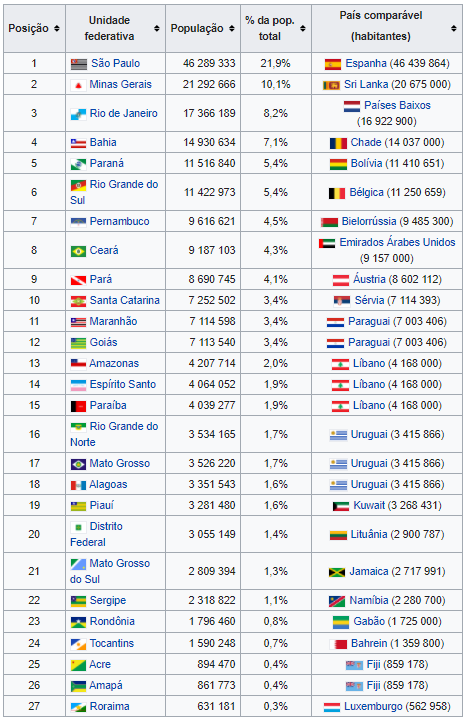

#### Agora **copiando e colando** a tabela aqui (deve-se usar Aspas Triplas para reconhecer os dados colados):

In [27]:
dados_da_populacao = '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)'''

#### Agora transformando em tabela estruturada usando a lib io no módulo StringIO:

In [28]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

pd.read_csv(dados_da_populacao_io, sep="\t")   # Lê como CSV e separado por TAB (/t)

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


#### Agora vamos investigar a tabela e transformá-la em um DataFrame denominado 'populacao':

In [29]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


#### Percebemos o seguinte problema:
- A primeira linha tem vários NaN e essa linha precisa ser eliminada com o dropna():

In [30]:
populacao = populacao.dropna()
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


#### Agora: ter o nome das colunas 'Unidade federativa'	e 'População' como 'uf' e 'populacao' (duas formas: ou renomear ou CRIAR novas colunas com os nomes já padronizados - será feita essa última):

In [31]:
populacao["populacao"] = populacao["População"]
populacao["uf"] = populacao["Unidade federativa"]
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável,populacao,uf
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864),46 289 333,São Paulo
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000),21 292 666,Minas Gerais
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900),17 366 189,Rio de Janeiro
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000),14 930 634,Bahia Bahia
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651),11 516 840,Paraná


In [32]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             27 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     object
 6   uf                  27 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


#### Observa-se que a coluna 'populacao' é objeto porque há ESPAÇOS entre os números. Retirar os espaços com **'str.replace'** e determinar a coluna como INT usando 'astype':

In [33]:
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)   # o replace trocou o espaço vazio por nada, eliminando-o

In [34]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             27 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     int32 
 6   uf                  27 non-null     object
dtypes: int32(1), object(6)
memory usage: 1.6+ KB


#### Para terminar vamos reduzir o dataframe apenas com as colunas 'populacao' e 'uf' e setar o índice como 'uf':

In [35]:
populacao = populacao[['populacao', 'uf']].set_index('uf')
display(populacao.head())
display(populacao.info())   # o 'display' permite que o head e o info sejam visualizados no mesmo bloco, sem precisar usar duas linhas diferentes

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int32
dtypes: int32(1)
memory usage: 324.0+ bytes


None

#### O passo é juntar o DF do gasto do mês mais recente com o DF populacao
Para isso vamos investigar o head do gasto do mês mais recente e observar o seu índice:

In [36]:
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo        177.41
31 Minas Gerais      79.78
33 Rio de Janeiro    49.15
41 Paraná            43.48
26 Pernambuco        39.47
Name: 2021/Mar, dtype: float64

#### Para juntar (join) os índices tem que ser os mesmos e percebe-se que o índice do gasto_do_mais_recente começa com 2 números 1 espaço antes do nome do Estado. Vamos retirar isso com SLICE  de STR:

In [37]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo        177.41
Minas Gerais      79.78
Rio de Janeiro    49.15
Paraná            43.48
Pernambuco        39.47
Name: 2021/Mar, dtype: float64

#### Agora vamos tentar unir os DF populacao e gastos_do_mais_recente usando o índice do nome dos Estados que parece ser igual (mas não é...):

In [38]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2021/Mar
uf,,
São Paulo,46289333,NaN
Minas Gerais,21292666,NaN
Rio de Janeiro,17366189,NaN
Bahia Bahia,14930634,NaN
Paraná,11516840,NaN


Vejam que não funcionou - há NaN na coluna do mes mais recente, ao invés dos valores dos gastos, indicando que os índices não estão iguais.

#### Investigando os índices dos DFs que tentou unir-se com Join para tentar achar erros:

In [39]:
populacao.index

Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

#### Observa-se no índice de população que há ESPAÇO antes do nome dos Estados. Vamos retirá-los com a funçao STRIP de STR que elimina espaços no início e no final:

In [40]:
populacao.index = populacao.index.str.strip()
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

#### Nova tentativa de Join:

In [41]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente

,populacao,2021/Mar
uf,,
São Paulo,46289333,177.41
Minas Gerais,21292666,79.78
Rio de Janeiro,17366189,49.15
Bahia Bahia,14930634,NaN
Paraná,11516840,43.48
Rio Grande do Sul,11422973,37.80
Pernambuco,9616621,39.47
Ceará,9187103,17.17
Pará Pará,8690745,NaN


#### Observou-se acima que as linhas de Bahia e Pará continuam com NaN porque os nomes dos Estados estavam duplicados (ao copiar a tabela na wikipedia o nome veio junto pela função html de "alt" que estava ativa nesse estados na página. Para corrigir:

Criamos um laço para 'estado' relacionando-o ao índice do DF 'gastos...' que tem os nomes corretos. Em seguida usamos 'replace' para trocar o índice do DF 'populacao' para quaisquer nomes de estados duplicados (estado estado) apenas por um 'estado':

In [42]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

#### Agora com os índices iguais, novamente o JOIN para juntas os DFs em um novo chamado gastos_e_populacao_recente:

In [43]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente

,populacao,2021/Mar
uf,,
São Paulo,46289333,177.41
Minas Gerais,21292666,79.78
Rio de Janeiro,17366189,49.15
Bahia,14930634,31.31
Paraná,11516840,43.48
Rio Grande do Sul,11422973,37.80
Pernambuco,9616621,39.47
Ceará,9187103,17.17
Pará,8690745,13.07


***
***

### Desafios Aula 1 - Módulo 2
***
***

#### Desafio 1 Aula 1: Ler diretamente da página web o arquivo da tabela de população do wikipedia (html).

Vamos usar a função pd.read_html ():

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

 Erro ao tentar importar: ImportError: lxml not found, please install it . Instalado agora

In [45]:
pip install lxml  

Note: you may need to restart the kernel to use updated packages.


In [46]:
tabela_pop_estados = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')

Verificando o total de tabelas que foram trazidas:

In [47]:
print(f'Total tables: {len(tabela_pop_estados)}')   # o f no print junta dois comandos internos, no caso o no total... com o len...

Total tables: 5


ImportError: html5lib not found, please install it . html5lib instalado  // ImportError: BeautifulSoup4 (bs4) not found, please install it. Instalado

In [48]:
pip install html5lib   

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


Encontradas 5 tabelas na página html acima. Tentar estabelecer apenas a tabela de interesse com 'Match' de palavra ou expressão que só tenha na tabela de interesse:

In [50]:
tabela_pop_estados = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o', match='Unidade federativa')

In [51]:
len(tabela_pop_estados)  # agora apemas 1 tabela veio

1

Testando a tabela importada da página da wikipedia:

In [52]:
tabela_pop_estados

[    Posição   Unidade federativa   População % da pop. total  \
 0         1            São Paulo  46 289 333           21,9%   
 1         2         Minas Gerais  21 292 666           10,1%   
 2         3       Rio de Janeiro  17 366 189            8,2%   
 3         4                Bahia  14 930 634            7,1%   
 4         5               Paraná  11 516 840            5,4%   
 5         6    Rio Grande do Sul  11 422 973            5,4%   
 6         7           Pernambuco   9 616 621            4,5%   
 7         8                Ceará   9 187 103            4,3%   
 8         9                 Pará   8 690 745            4,1%   
 9        10       Santa Catarina   7 252 502            3,4%   
 10       11             Maranhão   7 114 598            3,4%   
 11       12                Goiás   7 113 540            3,4%   
 12       13             Amazonas   4 207 714            2,0%   
 13       14       Espírito Santo   4 064 052            1,9%   
 14       15             

A tabela está correta. Agora transformar em DataFrame:

In [53]:
df_pop_estados = tabela_pop_estados[0]
df_pop_estados.info()
df_pop_estados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Posição                       27 non-null     int64 
 1   Unidade federativa            27 non-null     object
 2   População                     27 non-null     object
 3   % da pop. total               27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


A vantagem de pegar dados online é estarem sempre atualizados. A desvantagem é quando você não quer que mude e a página sai ou altera as informações. Aí se perde a fonte que servia.<br>
Para finalizar deve-se tratar os dados da tabela com População e % da pop total que estão como objeto para transformar em numeral. Fica para o desafio 4.

#### Desafio 02 - Aula 1: Neste desafio temos uma série de passos:

- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

Foi feito conforme reproduzção da aula: a eliminação de NAN com dropna; a padronização acrescentando novas colunas com os dados requeridos de outras; a transformação para tipo numérico coma os comandos da função STR (string) de strip e replace; e a padronização dos índices do dataframe usando o laço FOR do índice correto para transformar o índice com nomes duplicados do outro DF. Pode ser visto na AULA 1 acima a partir do passo **"Agora vamos investigar a tabela e transformá-la em um DataFrame denominado 'populacao':**

#### Desafio 03 - Aula 1 - Buscar na documentação alguns métodos envolvendo strings

Um artigo do próprio Guilherme da Alura, de nov/2018, para manipular STRINGS no pandas é bastante didático e pode ser visto em: https://www.alura.com.br/artigos/manipulacao-de-strings-no-pandas-lower-replace-startswith-e-contains<br>
Outro artigo que ajudou na resolução do Desafio 1 acima, além de ajudar a trazer a tabela direto da página HTML ensina a tratar as STRINGS que vem na tabela: https://pbpython.com/pandas-html-table.html<br>
Além disso a própria documentação do Python-Pandas para trabalhar com dados textuais com dezenas de funções pode ser visto em: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

#### Desafio 04 - Aula 1 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas **'pop_estados' e 'pop_e_gasto_mais_recente'.**
***
***

Nesse desafio será colocado como função a automatização da importação via webscrapping do DF da Wikipedia, a limpeza e preparação dos dados e o Join com os índices já organizados do DF dados_desejados (**gastos_do_mais_recente**)

In [54]:
def limpartratar_unir_popgastos (url_wiki, dados_desejados):

    # importando dado da url_wiki
    tabela_pop_estados = pd.read_html(url_wiki, match='Unidade federativa') # nome que identifica a tabela requerida na URL_wiki)
    # criando o dataframe a partir da posição 0
    pop_estados = tabela_pop_estados[0]
    # limpando e tratando
    pop_estados["populacao"] = pop_estados["População"].str.replace(" ", "").astype(int)
    pop_estados["uf"] = pop_estados["Unidade federativa"]
    pop_estados = pop_estados[["populacao", "uf"]].set_index("uf")
    # agora unficando com join a tabela df_pop_estados e os dados_mes_mais_recente (que é a DF: gastos_do_mais_recente)
    # o dados_desejados será o DF gastos_do_mais_recente que já teve o índice tratado apenas com os nomes dos Estados na Aula 1, portanto está pronto para o join
    pop_e_gasto_mais_recente = pop_estados.join(dados_desejados)
    #agora a função retorna as tabelas: pop_estados e pop_e_gasto_mais_recente
    return pop_estados, pop_e_gasto_mais_recente
    

Especificando a url e o DF de gastos mais recentes:

In [55]:
url_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
dados_desejados = gastos_do_mais_recente

Rodando a função para retornar as 2 tabelas na ordem: pop_estados / pop_e_gasto_mais_recente

In [56]:
limpartratar_unir_popgastos (url_wiki, dados_desejados)

(                     populacao
 uf                            
 São Paulo             46289333
 Minas Gerais          21292666
 Rio de Janeiro        17366189
 Bahia                 14930634
 Paraná                11516840
 Rio Grande do Sul     11422973
 Pernambuco             9616621
 Ceará                  9187103
 Pará                   8690745
 Santa Catarina         7252502
 Maranhão               7114598
 Goiás                  7113540
 Amazonas               4207714
 Espírito Santo         4064052
 Paraíba                4039277
 Rio Grande do Norte    3534165
 Mato Grosso            3526220
 Alagoas                3351543
 Piauí                  3281480
 Distrito Federal       3055149
 Mato Grosso do Sul     2809394
 Sergipe                2318822
 Rondônia               1796460
 Tocantins              1590248
 Acre                    894470
 Amapá                   861773
 Roraima                 631181,
                      populacao  2021/Mar
 uf                          

### Aula 2 - Módulo 2 - Proporcionalidades e Seaborn

#### Abaixo plotando gráfico de gastos (nova coluna feita a partir do último mês (MAR/21) e transformado em milhões) e população 
Essa visualização, apesar de ocorrer, é ruim nesse caso, pois as variáveis não são comparáveis visualmente

<AxesSubplot:xlabel='uf'>

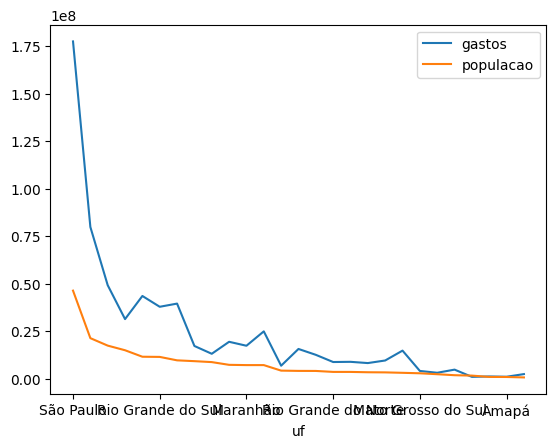

In [57]:
# horripilante (data visualization)
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2021/Mar"] * 1000000
gastos_e_populacao_recente[["gastos", "populacao"]].plot()

#### Se o objetivo é comparar gastos por habitante, a princípio pode-se tentar uma tabela e o cálculo dos valores (observa=se aqui um gasto de SP quase o dobro da BA para mar/21):

In [58]:
gastos_e_populacao_recente.loc[["Bahia", "São Paulo"]]

,populacao,2021/Mar,gastos
uf,,,
Bahia,14930634,31.31,31314602.44
São Paulo,46289333,177.41,177408317.71


In [59]:
print('SP', 177408317.71/46289333, 'BA', 31314602.44/14930634)

SP 3.832596112586025 BA 2.09733909758956


#### Agora sim fazer uma coluna no DF de gasto por habitante:

In [60]:
gastos_e_populacao_recente["gasto_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente.head()

,populacao,2021/Mar,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,177.41,177408317.71,3.83
Minas Gerais,21292666,79.78,79780838.00,3.75
Rio de Janeiro,17366189,49.15,49149884.48,2.83
Bahia,14930634,31.31,31314602.44,2.10
Paraná,11516840,43.48,43480729.07,3.78


#### Plotando:
ao não ordenar fica-se com duas informações: a ordem de dos Estados com os maiores gastos e as barras gasto_por_habitante

<AxesSubplot:xlabel='uf'>

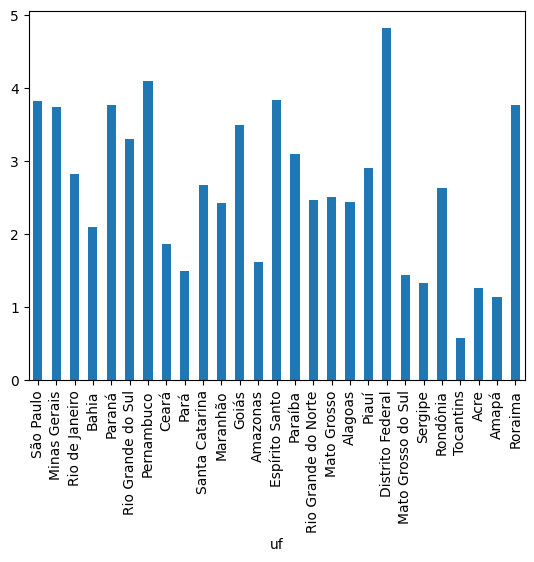

In [61]:
gastos_e_populacao_recente["gasto_por_habitante"].plot(kind='bar')

#### Trabalhando com SEABORN (módulo gráfico que utiliza também o pyplot do mathplotlib) - Fazendo gráfico de dispersão (Scatterplot) para visualizar população e gastos:

In [62]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='populacao', ylabel='gastos'>

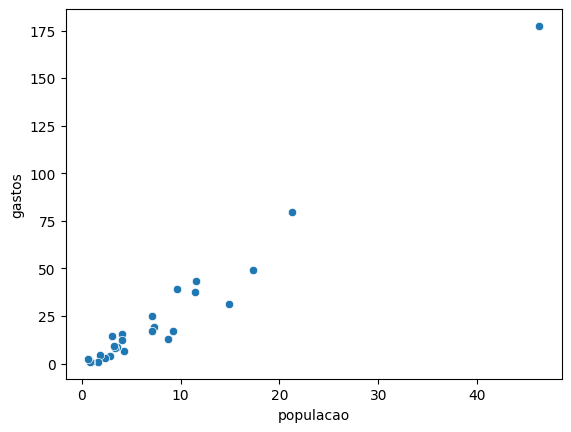

In [63]:
import seaborn as sns
# sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gastos") # dessa forma ambas escalas estão em notação científica em milhões
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos")   # aqui já dividimos em milhões para normalizar as escalas

Acima, parece haver uma relação indicando uma tendencia que quanto maior a população maior é o gasto.<br> **Abaixo** Vamos ver essa tendência em formato quadrado (possível linha de tendencia em 45 graus, apesar das escalas não serem de valores semelhantes) 

<AxesSubplot:xlabel='populacao', ylabel='gastos'>

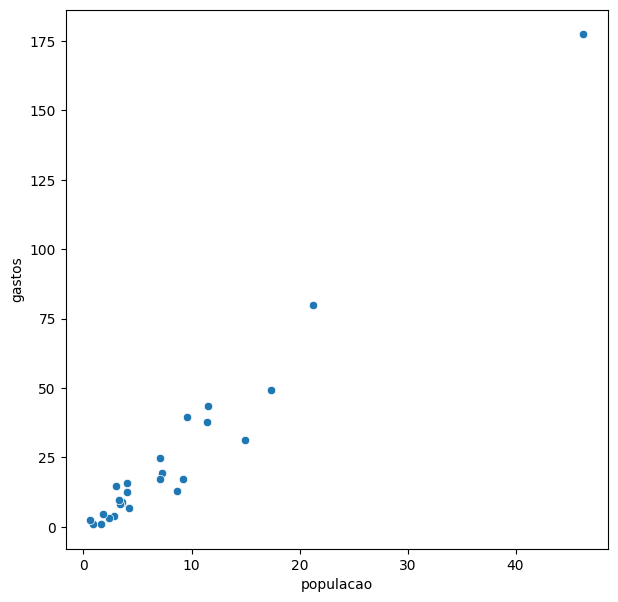

In [64]:
plt.figure(figsize=(7,7))   # comando de tamanho do pyplot 
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos")   # aqui já dividimos em milhões para normalizar as escalas

Agora vamos comparar o scatter plor de gasto_por_habitante e a população. Veremos que não há mais uma aparente relação entre o agora gasto_por_habitante e população pois nenhuma tendência se desenhou. 

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante'>

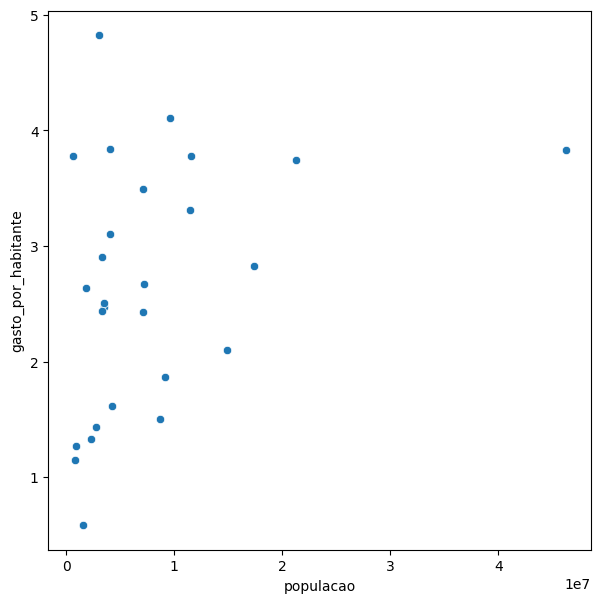

In [65]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante")

#### Definindo uma função para AUTOMATIZAR um DataFrame com gastos e gasto por habitante deo Mês/ANO (mes) que se deseja:
Ajudaria a resolver mais rápido e fácil o Desafio 2 abaixo, feito antes da segunda parte dessa aula no vídeo 2

In [66]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):   # são indicados os tipos das 3 variáveis para melhor controle. Isso é conhecido como Type hints.
    # todos_os gastos será o DF ordenado_por_total (que tem todos os estados desde 2008); dados será o DF gastos_e_populacao_recente que tem populacao, 2021/Mare gasto_por_habitantes 'mes' será a data que se quer, ex: 2021/Fev
    gastos_do_mes = todos_os_gastos[mes]
    dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
    dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]

In [67]:
gastos_e_populacao_recente.head()

,populacao,2021/Mar,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,177.41,177408317.71,3.83
Minas Gerais,21292666,79.78,79780838.00,3.75
Rio de Janeiro,17366189,49.15,49149884.48,2.83
Bahia,14930634,31.31,31314602.44,2.10
Paraná,11516840,43.48,43480729.07,3.78


#### Renomeando as colunas gastos para gastos_2021/Mar e gasto_por_habitante para gasto_por_habitante_2021/Mar para padronizar a tabela:

In [68]:
gastos_e_populacao_recente.rename(columns={"gastos": "gastos_2021/Mar", "gasto_por_habitante": "gasto_por_habitante_2021/Mar"}, inplace=True)

In [69]:
gastos_e_populacao_recente.head()

,populacao,2021/Mar,gastos_2021/Mar,gasto_por_habitante_2021/Mar
uf,,,,
São Paulo,46289333,177.41,177408317.71,3.83
Minas Gerais,21292666,79.78,79780838.00,3.75
Rio de Janeiro,17366189,49.15,49149884.48,2.83
Bahia,14930634,31.31,31314602.44,2.10
Paraná,11516840,43.48,43480729.07,3.78


#### Verificando o DF ordenado_por_total

In [70]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,...,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
31 Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,...,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
33 Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,...,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


In [71]:
ordenado_por_total.index

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '29 Bahia', '26 Pernambuco', '42 Santa Catarina',
       '23 Ceará', '52 Goiás', '15 Pará', '21 Maranhão', '32 Espírito Santo',
       '24 Rio Grande do Norte', '25 Paraíba', '53 Distrito Federal',
       '50 Mato Grosso do Sul', '22 Piauí', '27 Alagoas', '51 Mato Grosso',
       '13 Amazonas', '28 Sergipe', '17 Tocantins', '11 Rondônia', '12 Acre',
       '14 Roraima', '16 Amapá'],
      dtype='object', name='Unidade da Federação')

#### Rodando a função insere_gastos_e_gasto_por_habitante_para:

In [72]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2021/Fev")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2021/Jan")
gastos_e_populacao_recente.head()

,populacao,2021/Mar,gastos_2021/Mar,gasto_por_habitante_2021/Mar,gastos_2021/Fev,gasto_por_habitante_2021/Fev,gastos_2021/Jan,gasto_por_habitante_2021/Jan
uf,,,,,,,,
São Paulo,46289333,177.41,177408317.71,3.83,NaN,NaN,NaN,NaN
Minas Gerais,21292666,79.78,79780838.00,3.75,NaN,NaN,NaN,NaN
Rio de Janeiro,17366189,49.15,49149884.48,2.83,NaN,NaN,NaN,NaN
Bahia,14930634,31.31,31314602.44,2.10,NaN,NaN,NaN,NaN
Paraná,11516840,43.48,43480729.07,3.78,NaN,NaN,NaN,NaN


Vejam que tem colunas com 'NaN' porque o índice do DF ordenado_por_total não é igual (como visto acima) ao de gastos_e_população_recente.

#### Corrigindo o índice do DF ordenado_por_total para ficar IGUAL ao do gastos_e_populacao_recente:

In [73]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]
ordenado_por_total.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

#### Rodando novamente a função:

In [74]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2021/Fev")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2021/Jan")
gastos_e_populacao_recente.head()

,populacao,2021/Mar,gastos_2021/Mar,gasto_por_habitante_2021/Mar,gastos_2021/Fev,gasto_por_habitante_2021/Fev,gastos_2021/Jan,gasto_por_habitante_2021/Jan
uf,,,,,,,,
São Paulo,46289333,177.41,177408317.71,3.83,268193064.06,5.79,324115425.70,7.00
Minas Gerais,21292666,79.78,79780838.00,3.75,119877417.15,5.63,155064483.25,7.28
Rio de Janeiro,17366189,49.15,49149884.48,2.83,60873103.08,3.51,87201907.99,5.02
Bahia,14930634,31.31,31314602.44,2.10,55544579.04,3.72,70325599.07,4.71
Paraná,11516840,43.48,43480729.07,3.78,83130175.37,7.22,106948897.53,9.29


#### Rodando 1 Scaterplot de Jan-Mar de 2021 Gastos(totais) e 3 (Jan, Fev e Mar) de gasto_por_habitantes para análise:

<AxesSubplot:xlabel='População', ylabel='Gastos'>

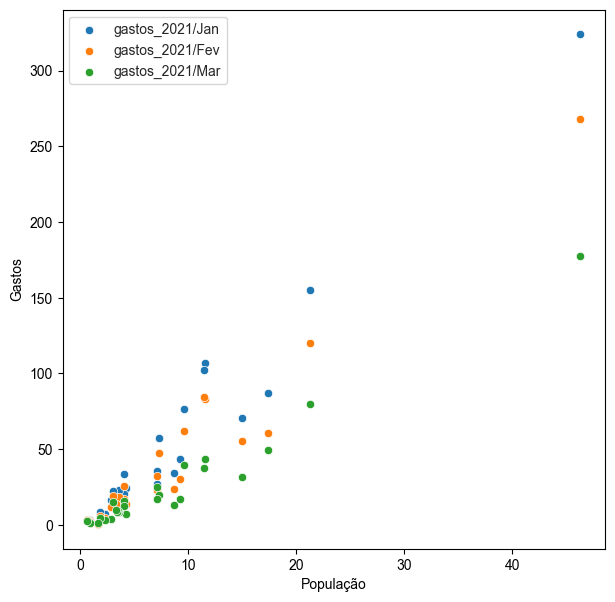

In [75]:
plt.figure(figsize=(7,7))
plt.ylabel('Gastos')
plt.xlabel('População')
sns.set_style('whitegrid')
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2021/Jan", label='gastos_2021/Jan')
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2021/Fev", label='gastos_2021/Fev')
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2021/Mar", label='gastos_2021/Mar')

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante_2021/Mar'>

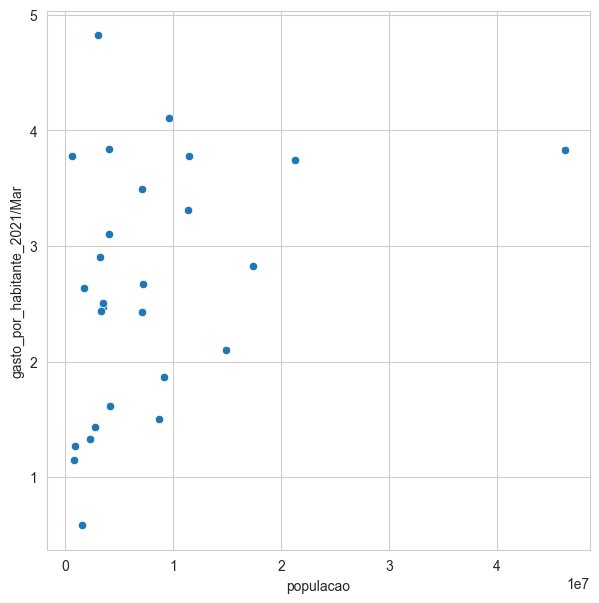

In [76]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2021/Mar")

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante_2021/Fev'>

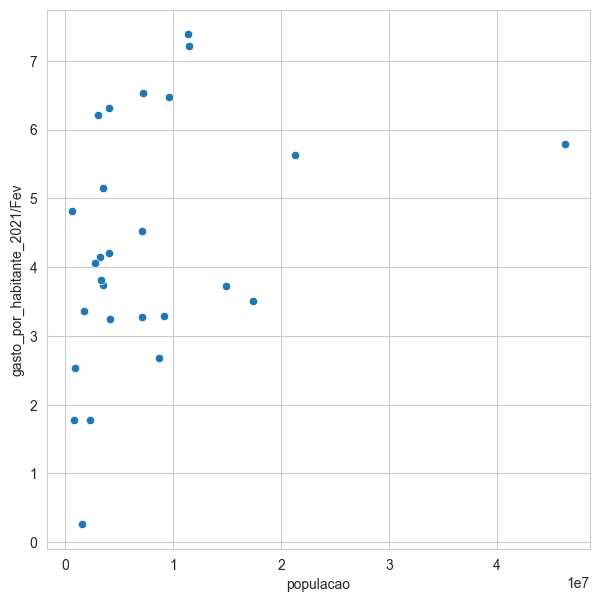

In [77]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2021/Fev")

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante_2021/Jan'>

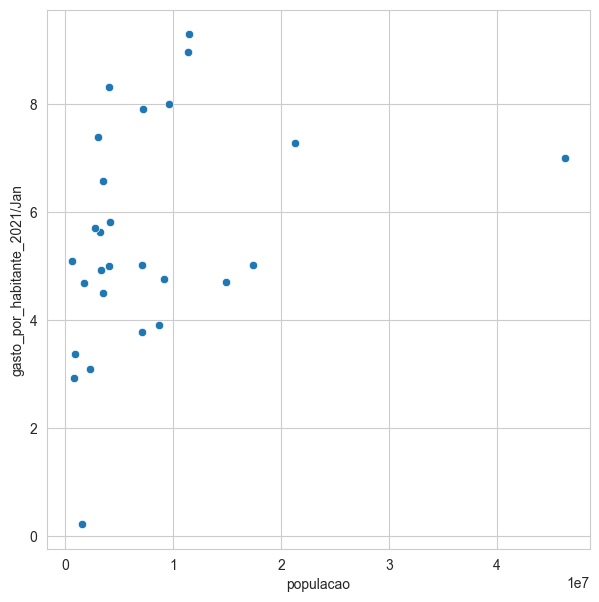

In [78]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2021/Jan")

O Scatter plot de gastos totais indicam tendencia de subida quando aumenta a população
Os outros 3 scatter plots dos meses separados de gasto_por_habitante não indicam tendencia. 
O menor valor dos meses é Março de 2021, que deve refletir o fato de ser o último mês desse dataframe atual. Como o DF é da data de internação, o preenchimento final dos valores pode ocorrer várias semanas depois, o que indica que, principalmente o último mês, pode estar ainda incompleto.

### Desafios Aula 2 - Módulo 2
***
***

#### Desafio 01 - Aula 2: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.


<AxesSubplot:xlabel='uf'>

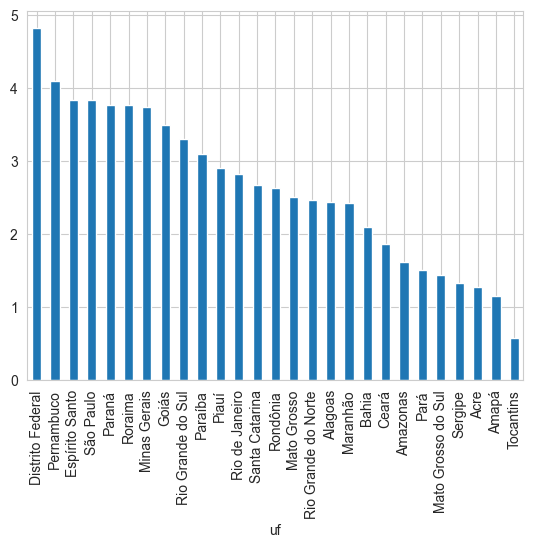

In [79]:
gastos_e_populacao_recente["gasto_por_habitante_2021/Mar"].sort_values(ascending=False).plot(kind='bar')

#### Desafio 02 - Aula 2: (Super Desafio Gui) Fazer os mesmos gráficos (scatterplot) do final da aulas 2.1 para meses anteriores (MAR/20 e MAR/19), analisar e compartilhar suas hipóteses.
NOTA: esse desafio foi feito antes da continuação do vídeo2 da aula. A solução dada no vídeo 2 (mostrada na AULA 2 acima) utiliza uma FUNÇÃO para automatizar a extração de gastos por MÊS

##### Determinando os meses de março para 2020 e 2019 com Slice:

In [80]:
ordenado_por_total.columns[-13:-12]

Index(['2020/Mar'], dtype='object')

In [81]:
ordenado_por_total.columns[-25:-24]

Index(['2019/Mar'], dtype='object')

##### Fazendo um DF apenas para março de 2019 e 2020:

In [82]:
mes_mar19 = ordenado_por_total.columns[-25:-24]
gastos_mar_19 = ordenado_por_total[mes_mar19]

In [83]:
mes_mar20 = ordenado_por_total.columns[-13:-12]
gastos_mar_20 = ordenado_por_total[mes_mar20]

In [84]:
gastos_mar19_20 = gastos_mar_19.join(gastos_mar_20)
gastos_mar19_20.head()

,2019/Mar,2020/Mar
Unidade da Federação,,
São Paulo,287.15,277.94
Minas Gerais,151.98,147.65
Paraná,123.91,114.78
Rio Grande do Sul,91.62,84.88
Rio de Janeiro,75.06,74.60


##### Novo DF para março 19-20-21 - juntando ao DF gastos_e_populacao_recente

In [85]:
gastos_e_populacao_mar19a21 = gastos_e_populacao_recente.join(gastos_mar19_20)
gastos_e_populacao_mar19a21.head()

,populacao,2021/Mar,gastos_2021/Mar,gasto_por_habitante_2021/Mar,gastos_2021/Fev,gasto_por_habitante_2021/Fev,gastos_2021/Jan,gasto_por_habitante_2021/Jan,2019/Mar,2020/Mar
uf,,,,,,,,,,
São Paulo,46289333,177.41,177408317.71,3.83,268193064.06,5.79,324115425.70,7.00,287.15,277.94
Minas Gerais,21292666,79.78,79780838.00,3.75,119877417.15,5.63,155064483.25,7.28,151.98,147.65
Rio de Janeiro,17366189,49.15,49149884.48,2.83,60873103.08,3.51,87201907.99,5.02,75.06,74.60
Bahia,14930634,31.31,31314602.44,2.10,55544579.04,3.72,70325599.07,4.71,69.98,71.00
Paraná,11516840,43.48,43480729.07,3.78,83130175.37,7.22,106948897.53,9.29,123.91,114.78


##### Acrescentando colunas 'gastos_mar20' , 'gastos_mar19' , 'gasto_por_habitante_mar20' e 'gasto_por_habitante_mar19':

In [86]:
gastos_e_populacao_mar19a21['gastos_2020/Mar'] = gastos_e_populacao_mar19a21['2020/Mar']*1000000 
gastos_e_populacao_mar19a21['gastos_2019/Mar'] = gastos_e_populacao_mar19a21['2019/Mar']*1000000 
gastos_e_populacao_mar19a21['gasto_por_habitante_2020/Mar'] = gastos_e_populacao_mar19a21['gastos_2020/Mar'] / gastos_e_populacao_mar19a21['populacao']
gastos_e_populacao_mar19a21['gasto_por_habitante_2019/Mar'] = gastos_e_populacao_mar19a21['gastos_2019/Mar'] / gastos_e_populacao_mar19a21['populacao']
gastos_e_populacao_mar19a21.head()

,populacao,2021/Mar,gastos_2021/Mar,gasto_por_habitante_2021/Mar,gastos_2021/Fev,gasto_por_habitante_2021/Fev,gastos_2021/Jan,gasto_por_habitante_2021/Jan,2019/Mar,2020/Mar,gastos_2020/Mar,gastos_2019/Mar,gasto_por_habitante_2020/Mar,gasto_por_habitante_2019/Mar
uf,,,,,,,,,,,,,,
São Paulo,46289333,177.41,177408317.71,3.83,268193064.06,5.79,324115425.70,7.00,287.15,277.94,277938674.53,287154994.64,6.00,6.20
Minas Gerais,21292666,79.78,79780838.00,3.75,119877417.15,5.63,155064483.25,7.28,151.98,147.65,147654942.70,151976196.81,6.93,7.14
Rio de Janeiro,17366189,49.15,49149884.48,2.83,60873103.08,3.51,87201907.99,5.02,75.06,74.60,74595986.00,75063150.71,4.30,4.32
Bahia,14930634,31.31,31314602.44,2.10,55544579.04,3.72,70325599.07,4.71,69.98,71.00,70998470.80,69982697.43,4.76,4.69
Paraná,11516840,43.48,43480729.07,3.78,83130175.37,7.22,106948897.53,9.29,123.91,114.78,114776571.27,123907372.22,9.97,10.76


##### Organizando a ordem das colunas com sort_index (só pra arrumar mesmo)

In [87]:
gastos_e_populacao_mar19a21 = gastos_e_populacao_mar19a21.sort_index (axis = 1) 
gastos_e_populacao_mar19a21.head()

,2019/Mar,2020/Mar,2021/Mar,gasto_por_habitante_2019/Mar,gasto_por_habitante_2020/Mar,gasto_por_habitante_2021/Fev,gasto_por_habitante_2021/Jan,gasto_por_habitante_2021/Mar,gastos_2019/Mar,gastos_2020/Mar,gastos_2021/Fev,gastos_2021/Jan,gastos_2021/Mar,populacao
uf,,,,,,,,,,,,,,
São Paulo,287.15,277.94,177.41,6.20,6.00,5.79,7.00,3.83,287154994.64,277938674.53,268193064.06,324115425.70,177408317.71,46289333
Minas Gerais,151.98,147.65,79.78,7.14,6.93,5.63,7.28,3.75,151976196.81,147654942.70,119877417.15,155064483.25,79780838.00,21292666
Rio de Janeiro,75.06,74.60,49.15,4.32,4.30,3.51,5.02,2.83,75063150.71,74595986.00,60873103.08,87201907.99,49149884.48,17366189
Bahia,69.98,71.00,31.31,4.69,4.76,3.72,4.71,2.10,69982697.43,70998470.80,55544579.04,70325599.07,31314602.44,14930634
Paraná,123.91,114.78,43.48,10.76,9.97,7.22,9.29,3.78,123907372.22,114776571.27,83130175.37,106948897.53,43480729.07,11516840


##### Plotando com os gastos das 3 datas para comparar(com subplots):

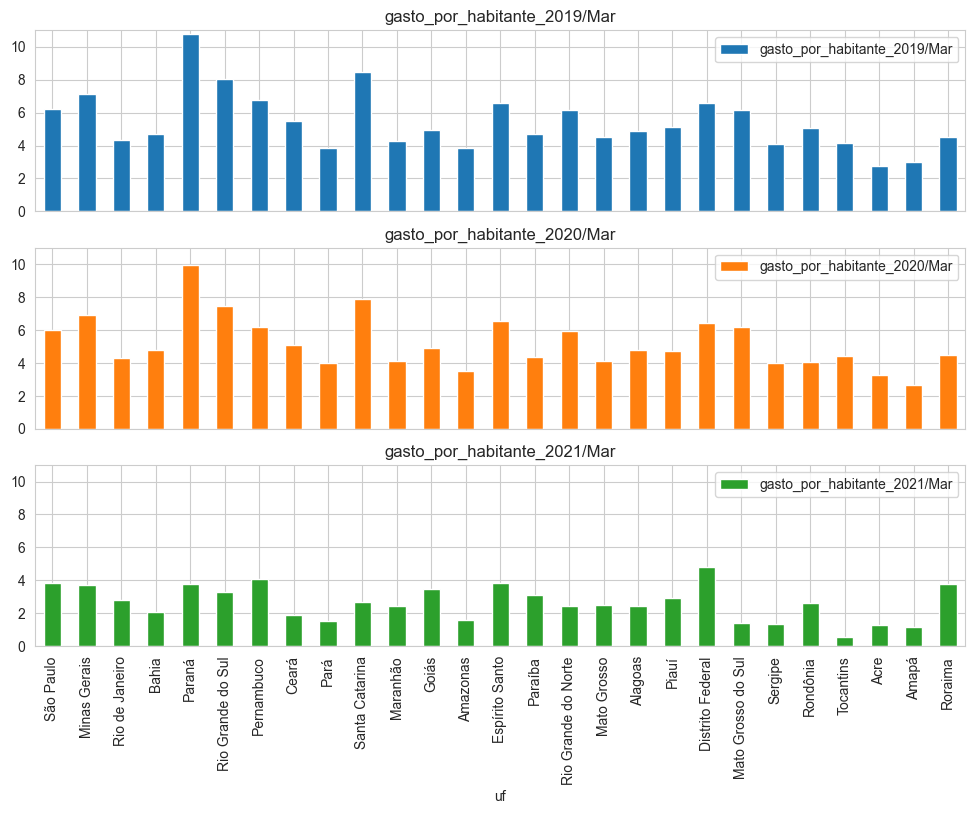

In [88]:
import matplotlib.pyplot as plt
axes = gastos_e_populacao_mar19a21[['gasto_por_habitante_2019/Mar', 'gasto_por_habitante_2020/Mar', 'gasto_por_habitante_2021/Mar']].plot.bar(figsize=(12,8), subplots=True, ylim=(0,11))
# plt.show()

**Análise:** 
- O padrão dos Estados parece se comportar da mesma forma em mar 2019 e 2020 , no entanto o mesmo não ocorre para mar de 2021, com gastos/habitante (vide eixo Y) notavelmente menor, muitas vezes se situando em torno da metada em relação dos anos anteriores.
- Para alguns Estados, notavelmente o Paraná, há um aparente valor muito alto para o mês de março, de maneira que o situa em primeiro lugar se considerar apenas o mês de março em 2019 e 2020. Já em 2021 o DF ficou em primeiro nesse mês específico em gastos/habitante.
**Hipóteses:**
- Para investigar a diminuição de gastos em mar/2021 pode-se comparar os meses seguintes e até anteriores. Caso o gasto/habitante continue menor que 2019 e parte de 2020 é sinal que um menor uso da estrutura hospitalar tenha ocorrido. Isso coincide exatamente com o isolamneto social causado pela Covid-19 que, ao menos em um primeiro momento, ocasionou uma diminuição do uso hospitalar pela população.
- Para o Estado do Paraná e Distrito Federal, por exemplo, pode-se investigar as possibilidades de uma concentração maior de gastos serem lançados no mês de MARÇO, seja por questões processuais administrativas, ou ainda por questões de grande aumento de fluxo populacional local em virtude de férias no caso do Paraná (vide que RS e SC também tem esse aumento) ou ainda no caso de uma estrutura hospitalar maior e melhor, possivelmente com atendimento de maior valor agregado, para servir a população.

##### Vendo o mês de **MAR/20** com Scatterplot, tanto de gastos totais quanto de gasto_por_habitante, ambos pela população:

<AxesSubplot:xlabel='populacao', ylabel='gastos_2020/Mar'>

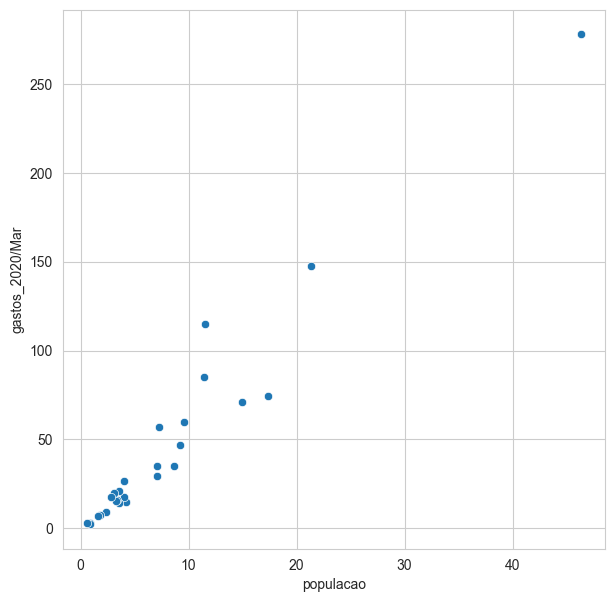

In [89]:
plt.figure(figsize=(7,7))   # comando de tamanho do pyplot 
sns.scatterplot(data=gastos_e_populacao_mar19a21 / 1000000, x="populacao", y="gastos_2020/Mar")   # aqui já dividimos em milhões para normalizar as escalas

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante_2020/Mar'>

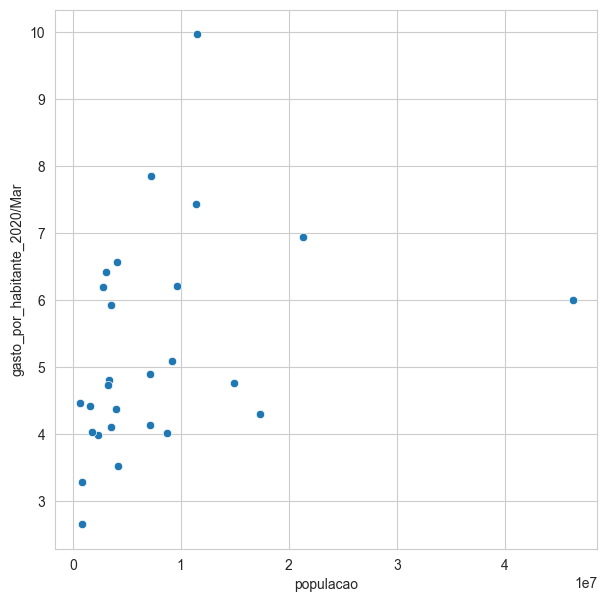

In [90]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_mar19a21, x="populacao", y="gasto_por_habitante_2020/Mar")

**Análise:** 
- O padrão dos gastos_por_mes, tanto de 2021, quanto de 2020, parece se comportar da mesma forma em relação a população, com uma pequena dispersão a mais em mar/2020. Continua parecendo existir uma relação indicando uma tendencia que quanto maior a população maior é o gasto para ambas as datas. Apesar disso o gasto de MAR/20 é maior cerca de 40% em relação a MAR/21. 
- No caso do scatterplot de gasto_por_habitante com a população de MAR/20, da mesma forma que MAR/21, não tem uma aparente relação pois nenhuma tendência se desenhou. No entanto para **MAR/20 o valor de gasto/habitante (vide eixo Y) é maior (o dobro aparente) que para MAR/21.
**Hipóteses:**
- Para investigar a diminuição de gastos em MAR/2021 tanto de gastos totais quanto de gasto por habitante, pode-se comparar os meses seguintes e anteriores do período. Caso o gasto/habitante continue apresentando distorções no total e no específico por_habitante, é indicativo de alteração do uso da estrutura hospitalar. Isso coincide com o isolamneto social causado pela Covid-19 que ocasionou uma diminuição do uso hospitalar pela população a partir de pelo menos maio de 2020 em diante com consequente menor gasto.

#### Desafio 03 - Aula 2: (Super Desafio Thiago) Plotar no mesmos gráficos do final da aula com outros meses (o mês anterior e o mês corrente podem permitir análise de variação do DF em variação contínua), analisar e compartilhar suas hipóteses.

<AxesSubplot:xlabel='População', ylabel='Gastos'>

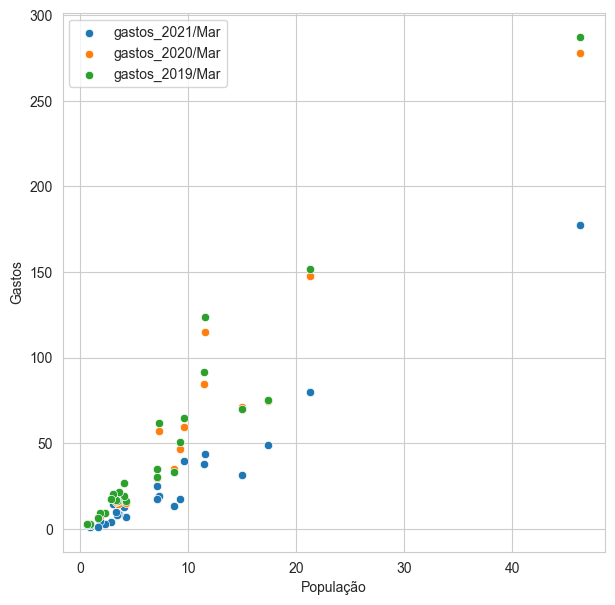

In [91]:
plt.figure(figsize=(7,7))   # comandos plt são do pyplot que roda por trás do seaborn
plt.ylabel('Gastos')
plt.xlabel('População')

sns.set_style('whitegrid')
# Essa não é a melhor forma de plotar várias séries em um gráfico, mas aqui com Seaborn, podemos fazer assim, neste momento.
sns.scatterplot(data=gastos_e_populacao_mar19a21 / 1000000, x="populacao", y="gastos_2021/Mar", label='gastos_2021/Mar')
sns.scatterplot(data=gastos_e_populacao_mar19a21 / 1000000, x="populacao", y="gastos_2020/Mar", label='gastos_2020/Mar')
sns.scatterplot(data=gastos_e_populacao_mar19a21 / 1000000, x="populacao", y="gastos_2019/Mar", label='gastos_2019/Mar')

<AxesSubplot:xlabel='População', ylabel='Gasto por Habitante'>

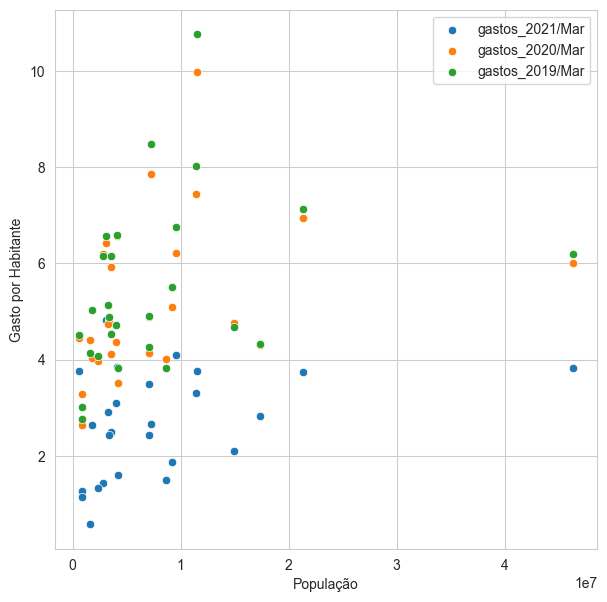

In [92]:
plt.figure(figsize=(7,7))   # comandos plt são do pyplot que roda por trás do seaborn
plt.ylabel('Gasto por Habitante')
plt.xlabel('População')

sns.set_style('whitegrid')
sns.scatterplot(data=gastos_e_populacao_mar19a21, x="populacao", y="gasto_por_habitante_2021/Mar", label='gastos_2021/Mar')
sns.scatterplot(data=gastos_e_populacao_mar19a21, x="populacao", y="gasto_por_habitante_2020/Mar", label='gastos_2020/Mar')
sns.scatterplot(data=gastos_e_populacao_mar19a21, x="populacao", y="gasto_por_habitante_2019/Mar", label='gastos_2019/Mar')

**Análise:** O mesmo se observa em relação aos Scatterplots do Desafio 2 acima:
- Há aparente tendencia de crescimento dos gastos totais de acordo com o tamanho da população para os 3 períodos
- Não há padrão aparente em gasto_por_habitante dos períodos de acordo com a população.
- Os gastos totais e por habitantes de MAR/21 são 40 a 50% menores que os do mesmo mês de 2019 e 2020

**Hipóteses:** 
- As variações de gastos totais e gasto por habitante pela população podem se relacionar a padrões e características hospitalares de cada Estado e não por total de população
- A diminuição dos valores para MAR/2021 parece se relacionar com a pandemia de COVID-19 e o isolamento social

#### Desafio 04 - Aula 2: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.
***
***

**ANÁLISE:**<br>
1) Há diferença de gastos por população entre os Estados.
2) Esses gastos não obedecem a um aumento populacional. Não há padrão.
3) Os gastos totais e por habitantes variaram tanto no mês mais recente de mar/2021 (gasto menor) em relação aos anteriores, quanto em relação ao mesmo mês de março dos anos anteriores (2019 e 2020).
<br>
**HIPÓTESES:**<BR>
Há diversas hipóteses que podem se relacionar as análises acima e que podem valer maiores explorações do cientista da de dados:
- Para o relacionado aos itens 1) e 2) acima pode ser explorado:
    - Maior oferta de serviços hospitalatres de um Estado em relação a ouro
    - Maior facilidade de acesso da população de Estados diferentes aos serviços de saúde e o consequente uso maior
    - Desconcentração e melhor distribuição espacial dos equipamentos de saúde nos Estados
    - Maior quantidade e equipamentos mais modernos disponíveis por atendimento em alguns Estados, com consequente maior valor de custo por atendimento
    - Alguns Estados podem ter estruturas de saúde mais simples, com maior parte em ambulatórios ou atendimento básico, com consequente menor custo por atendimento
    - Alguns Estados podem ter maior estrutura de internação e conjunto maior de equipamentos mais avançados, que podem aumentar a sobrevida em caso de internação. com consequente maior custo.
- Para o relacionado ao item 3) acima:
    - Há clara influencia da pandemia de Covid-19 na diminuição do uso de estruturas de saúde por conta do isolamento social e medo do contágio do vírus Sars-Cov que aumentou a partir de abril ou maio de 2020. Isso deve estar diretamente ligado ao fato do mês de Mar/2021 ter gastos menores.
    - Ao fato do DataFrame obtido a partir de gastos por mês de internação ainda poder receber valores que muitas vezes só são lançados várias semanas depois, principalemnte para os meses de Jan-Mar de 2021

### Aula 3 - Módulo 2 - Ticks, escalas e formatação de imagens

#### Vamos agora voltar a trabalhar com valores com o DataFrame 'ordenado_por_total':

In [93]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,...,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,...,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,...,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


#### Visualização de valores com Seaborn e suas opções:

O padrão do sactterplot, 3 fatores: DataFrame, Eixo X da distribuição, e Eixo Y com os valores
<br> No caso abaixo podemos notar que os valores (eixo Y) são uma linha, por isso precisamos usar o Loc. O eixo x (distribuição saõ exatamente a coluna). Como já foram especificados os locais exatos, o no do DataFrame não se torna necessário.<br>
Vemos que os nomes do eixo X (ticks) aparecem todos sobrepostos e ilegíveis.

<AxesSubplot:ylabel='São Paulo'>

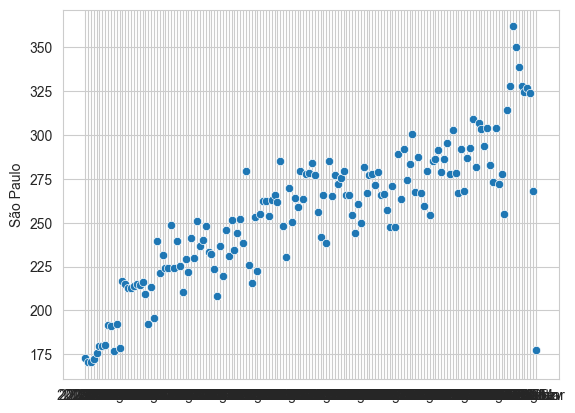

In [94]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])

#### Lembremos que se fizermos a transposição do índice do DataFrame, poderemos usá-lo da maneira programada especificando o DataFrame e pelo Estado desejado sem precisar de Loc:

In [95]:
ordenado_por_total.T.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


#### Fazendo um novo DataFrame 'mensal_por_estado' transposto:

In [96]:
mensal_por_estado = ordenado_por_total.T
mensal_por_estado.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


#### Novamente o Scatterplor agora com os 3 fatores padrão estabelecidos:

<AxesSubplot:ylabel='São Paulo'>

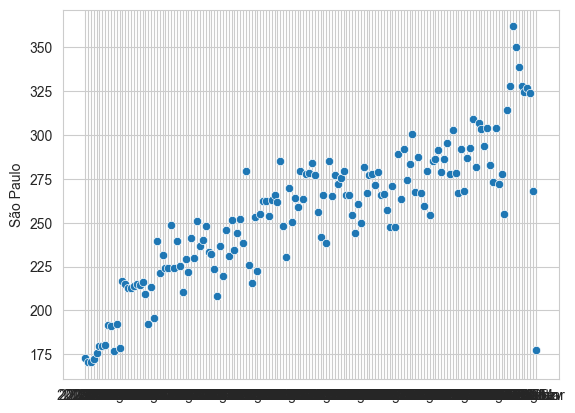

In [97]:
sns.scatterplot(data=mensal_por_estado, x=mensal_por_estado.index, y='São Paulo')

##### Vamos explorar outros controles relacionados a gráficos Seaborn:

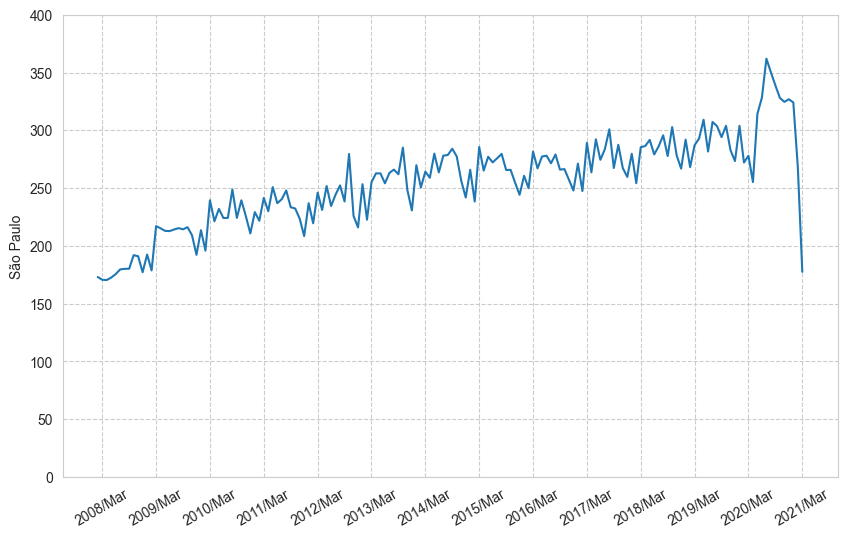

In [99]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))   # o matplotlib roda por trás do seaborn
ax = sns.lineplot(data=mensal_por_estado, x=mensal_por_estado.index, y="São Paulo")   # ax é a definição padrão dos AXis que são as partes do gráfico. Lineplot é o gráfico de Linha no Seaborn.
plt.xticks(rotation=30)   # xticks são os rótulos do eixo x e a rotation é a inclinação dada em graus (no caso inclinação de 30 graus) - matplotlib
plt.ylim(0, 400)   # Limites da escala do eixo Y - matplotlib
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=1))   # xaxis.set_major_locator controla as características de quantidade e posição dos rótulos do eixo X. O Indexlocator é apenas uma delas, que noca caso estabelece um intervalo de 12 em 12 e começando da posição 1 (mar/2008)
plt.grid(linestyle="--") # Quando usa o grid o default é que já apareçam as linhas de grid (True) então não precisa especificar e o linestyle é uma especificação de Estilo da linha (tracejado aqui)
plt.show() # esse comando evita que apareçam textos antes do gráfico em si, relacionados as especificações feitas acima
# Deve-se pesquisar as diversas especificações com a documentação do Matplotlib. Ex: pesquisar por matplotlib tick locator retorna logo na 1ª opção o link dessa documentação de controle da posição dos ticks

### Desafios Aula 3 - Módulo2
***
***

#### Desafio 01 - Aula3: Fazer o scatter plot feito em aula para o seu Estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.
Documentação de referência SeaBorn em https://seaborn.pydata.org/generated/seaborn.scatterplot.html e matplotlib em https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
<br>
#### Desafio 02 - Aula 3: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

**Abaixo desafios 2 e 3: pode-se ver a tendência de subida dos gastos e os últimos meses com a possibilidade de não ter o valor completo ainda, em virtude de lançamentos poderem demorar semanas**

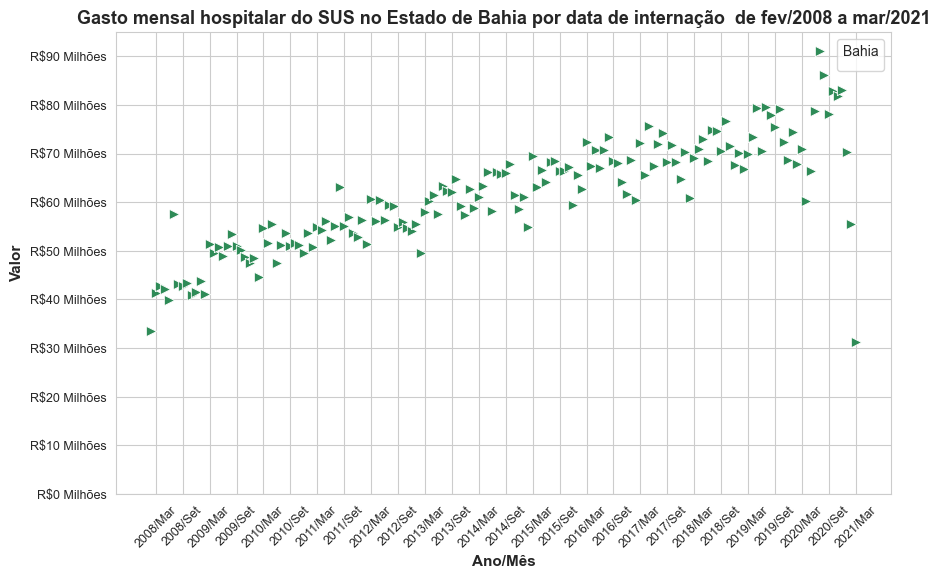

In [100]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0, 95) 
plt.grid(linestyle="-") 
plt.title('Gasto mensal hospitalar do SUS no Estado de Bahia por data de internação  de fev/2008 a mar/2021', fontsize=13, weight=(700))
plt.ylabel('Valor', fontsize=11, weight=(700)) 
plt.xlabel('Ano/Mês', fontsize=11, weight=(700))
plt.legend(title='Bahia', labels=())
plt.locator_params(axis='y', nbins=12)

ax = sns.scatterplot(data=mensal_por_estado, x=mensal_por_estado.index, y='Bahia', marker='>', color='seagreen', s=55)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=6, offset=1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f} Milhões'))
ax = sns.set_style('darkgrid')

plt.show() 

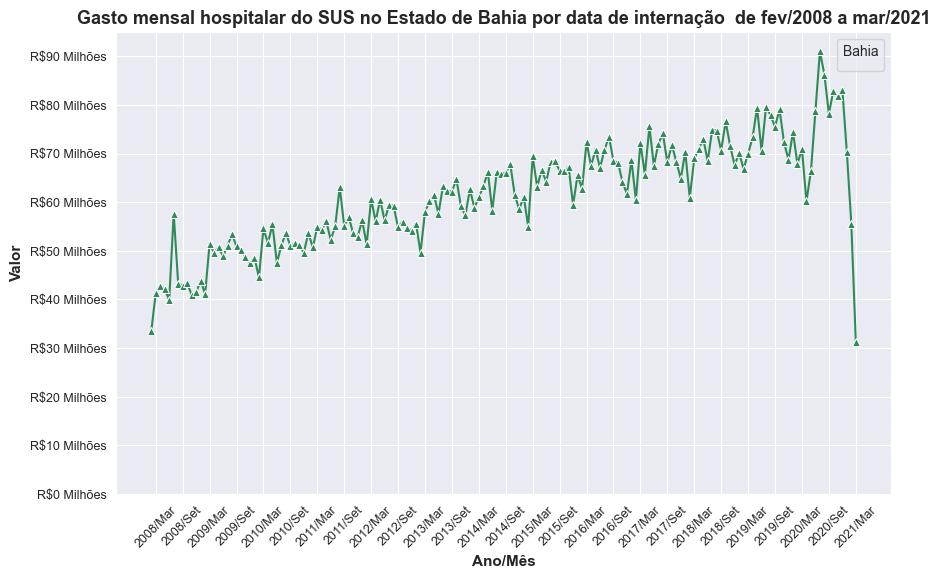

In [101]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0, 95) 
plt.grid(linestyle="-") 
plt.title('Gasto mensal hospitalar do SUS no Estado de Bahia por data de internação  de fev/2008 a mar/2021', fontsize=13, weight=(700))
plt.ylabel('Valor', fontsize=11, weight=(700)) 
plt.xlabel('Ano/Mês', fontsize=11, weight=(700))
plt.legend(title='Bahia', labels=())
plt.locator_params(axis='y', nbins=12)

ax = sns.lineplot(data=mensal_por_estado, x=mensal_por_estado.index, y='Bahia', marker='^', color='seagreen')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=6, offset=1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f} Milhões'))
ax = sns.set_style('darkgrid')

plt.show() 

***
***

### Aula 4 - Módulo 2 - Trabalhado DateTime e Melt

#### Vimos que as datas '2008/Mar' etc. do DataFrame são Strings e não data. Isso dificulta algumas análises. Podemos transformá-las no formato de data de verdade.

O datetime é um módulo (como o pandas por ex) que tem vários objetos (classes) dentro: datetime (sim repete o nome quando vai trabalhar a data e hora ao mesmo tempo), o date (só para data) e outros, além de construtores dentro de cada um. Para saber mais vide a documentação: https://docs.python.org/3/library/datetime.html

#### Vamos rever o DF mensal_por_estado:

In [102]:
mensal_por_estado.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [103]:
mensal_por_estado.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov',
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar'],
      dtype='object', length=158)

#### Vamos plotar novamente o gráfico lineplot simples da aula passada - lembramos que somente usando set_major_locator conseguimos controlar os ticks do eixo X, que é uma string:

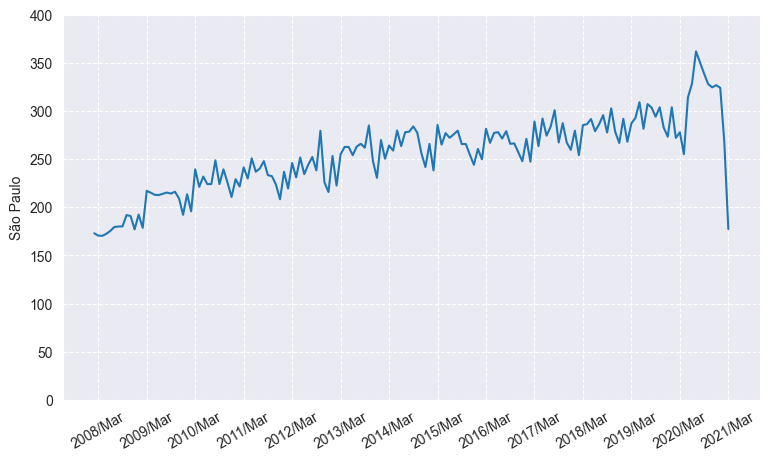

In [104]:
plt.figure(figsize=(9,5))
ax = sns.lineplot(data=mensal_por_estado, x=mensal_por_estado.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 400)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=1))
plt.grid(linestyle="--") 
plt.show()

#### Agora vamos transformar o eixo X string em formato de DATA. Começa importando a classe (objeto) 'date' dentro de 'datetime':

In [105]:
from datetime import date    # LEMBRANDO que se fosse trabalhar data e tempo na mesma coluna ou índice, faríamos da seguinte forma: import datetime.datetime

#### Agora vamos fazer uma FUNÇÃO que cahamaremos de **'para_dia'** (uma data com Dia, mes e ano) para converter as strings '2008/Fev' (ano_mes) e etc para o formato DATE, em que escolhemos a forma da data: #ano, #mes, #dia(1), ou seja por exemplo (2008, 2, 1). Vamos assumir aqui que o dia de cada mês será sempre o dia primeiro:
- Para capturarmos o ANO podemos fazer um Slice dos 4 primeiros caracteres.
- Para transformar o MÊS em número vamos fazer um dicionário **'meses'** com slice, que servirá obviamente para todo o período de 2008 a 2021

In [106]:
meses = {
    'Jan': 1,
    'Fev': 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12    
}

def para_dia(ano_mes: str):
    ano: int = int(ano_mes[:4])    # aqui usamos o hint de que o ano: é inteiro(int) - esses hints ou definições de formato na função são utilizadas para controlar erros caso alguma conversão dê errado
    mes: str = ano_mes[5:]   # aqui usamos o hint de que o mes: é string(str)
    mes_numero: int = meses[mes]
    return date(ano, mes_numero, 1)    # retorna o ano(inteiro), o mes_numero(inteiro) e o dia que assuminos ser sempre dia 1 (inteiro), satisfazendo o objeto 'date' para o que queríamos (pode outras formas tb. Vide documentação)

#### Agora aplicando a Função 'para_dia' no índice do DF 'mensal_por_estado' (que é exatamente o ano_mes definido). Para isso devemos usar a função **map()** já existente no índice.
- O map() permite relacionar cada data (date) que fizemos na função 'para_dia' COM a data string do Índice do DF, transformando o índice em date.

In [107]:
mensal_por_estado.index = mensal_por_estado.index.map(para_dia)
mensal_por_estado.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


#### Agora plotando novamente, vimos que o Seaborn e vários outros módulos já entendem o índite como *date* e não é mais necessário usar o 'set_major_locator', pois o tratamento do eixo x já é mais esperto pois a *date* agora é entendida (ficou anual começando em janeiro de cada ano). Transformar em *date* também permite a seleção e queries muita mais ágeis e precisos. 

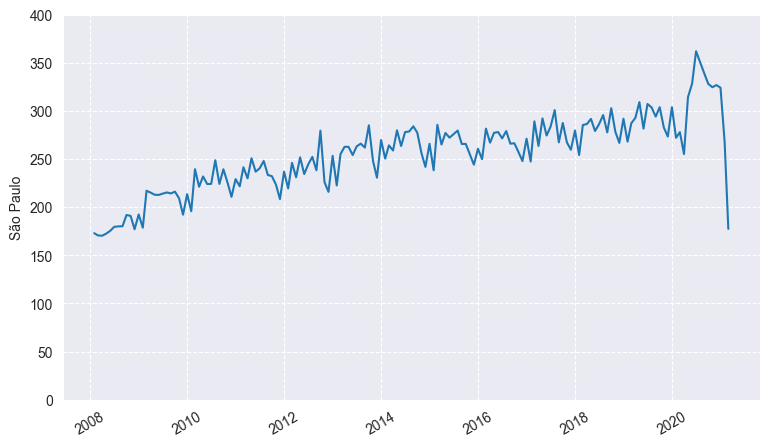

In [108]:
plt.figure(figsize=(9,5))
ax = sns.lineplot(data=mensal_por_estado, x=mensal_por_estado.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 400)
plt.grid(linestyle="--")
plt.show()

#### Constatando o DF com índice mudado com info() mostra que são 158 linhas começando em 2008-02-01 to 2021-03-01:

In [109]:
mensal_por_estado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 2008-02-01 to 2021-03-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            158 non-null    float64
 1   Minas Gerais         158 non-null    float64
 2   Paraná               158 non-null    float64
 3   Rio Grande do Sul    158 non-null    float64
 4   Rio de Janeiro       158 non-null    float64
 5   Bahia                158 non-null    float64
 6   Pernambuco           158 non-null    float64
 7   Santa Catarina       158 non-null    float64
 8   Ceará                158 non-null    float64
 9   Goiás                158 non-null    float64
 10  Pará                 158 non-null    float64
 11  Maranhão             158 non-null    float64
 12  Espírito Santo       158 non-null    float64
 13  Rio Grande do Norte  158 non-null    float64
 14  Paraíba              158 non-null    float64
 15  Distrito Federal     158 non-

#### Fazendo um Slice da entrada (linha) 0 para mostrar o tipo e a data que retornou:

In [110]:
mensal_por_estado.index[0]

datetime.date(2008, 2, 1)

#### Agora Voltando ao gráfico limeplot, vimos uma limitação para plotar mais de um Estado aqui, pois o dataframe só possui o índice das DATAS e as colunas dos Estados com os gastos preenchidos.
Abaixo não é a forma mais adequada para plotar gastos de dois estados pois a legenda e títulos dos eixos tem que ser definidos manualmente

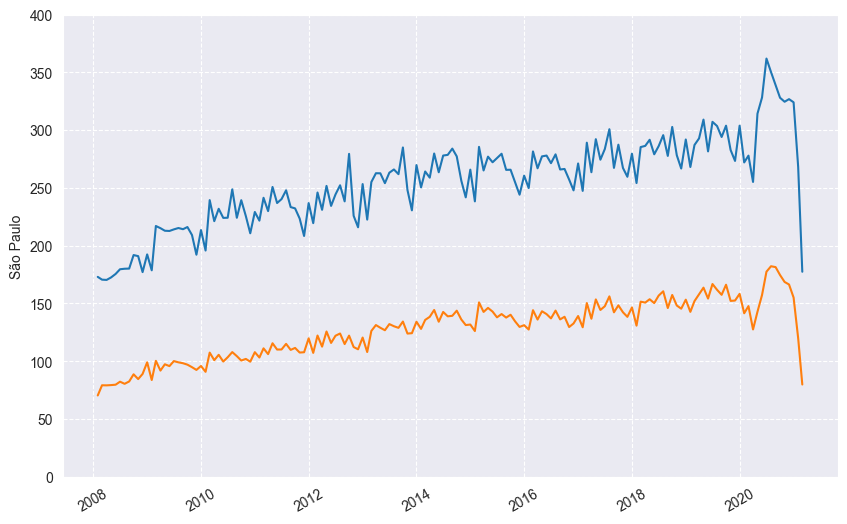

In [111]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_por_estado, x=mensal_por_estado.index, y="São Paulo")
ax = sns.lineplot(data=mensal_por_estado, x=mensal_por_estado.index, y="Minas Gerais")
plt.xticks(rotation=30)
plt.ylim(0, 400)
plt.grid(linestyle="--")
plt.show()

# problemas:
# 1. eixos
# 2. legenda
# 3. serio mesmo? copy e paste das linhas do grafico?

In [112]:
mensal_por_estado.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


#### Para mudar o formato do DataFrame vamos usar o Melt para tentar algo assim:

```
MES        VALOR     ESTADO
2008-03    170.48    Sao Paulo
2008-03     79.12    Minas Gerais
...
```
- Cada MES se repetirá 27x (para cada Estado) abrindo mais uma dimensão ao DF e independência na definição para plotar um gráfico
- Vamos chamar esse novo DF de mensal_aberto

#### Primeiro vamos nomear o DF e resetar o índice:

In [113]:
mensal_aberto = mensal_por_estado.reset_index()

In [114]:
mensal_aberto.head()

Unidade da Federação,index,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
0,2008-02-01,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
1,2008-03-01,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2,2008-04-01,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
3,2008-05-01,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
4,2008-06-01,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [115]:
mensal_aberto.index

RangeIndex(start=0, stop=158, step=1)

#### Agora definir com o MELT que o NOME de todas as colunas (id_vars), EXCETO o nome da coluna 'index' (que virou coluna depois do reset_index) vão virar preenchimento da nova coluna Unidade da Federação E ainda que os valores de gastos dos estados preenchidos no DF (value_vars) virarão por sua vez outra coluna de valores (value por default)

In [116]:
mensal_aberto = mensal_aberto.melt(id_vars=['index'], value_vars=mensal_por_estado.columns)

In [117]:
mensal_aberto.head()

,index,Unidade da Federação,value
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


#### Agora podemos renomear as colunas:

In [118]:
mensal_aberto.columns = ["mes", "uf", "gasto"]
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


#### O MELT reformula (como se derretesse) o DataFrame para esse formato. Todos os passos deo RESET INDEX até o RENOMEAR das colunas poderiam ter sido feitos em bloco de uma vez assim:
mensal_aberto = mensal_por_estado.reset_index().melt(id_vars=["index"], value_vars=mensal_por_estado.columns)<br>
mensal_aberto.columns = ["mes", "uf", "gasto"]<br>
mensal_aberto.head()

#### Agora podemos plotar o lineplot da maneira correta.
- O primeiro gráfico abaixo retornou com o valor médio dos gastos de todos os Estados e um intervalo de confiança calculado automaticamente. Não é o que queremos.
- Adicionando o Parametro **HUE** é que pode-se especificar os critérios de todos os Estados (como no 2º grafico abaixo):

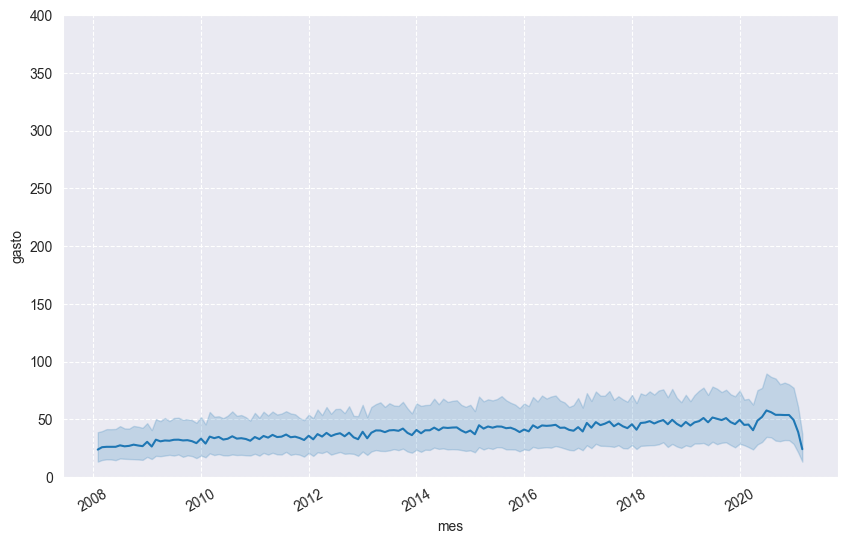

In [119]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto")
plt.xticks(rotation=30)
plt.ylim(0, 400)
plt.grid(linestyle="--")
plt.show()

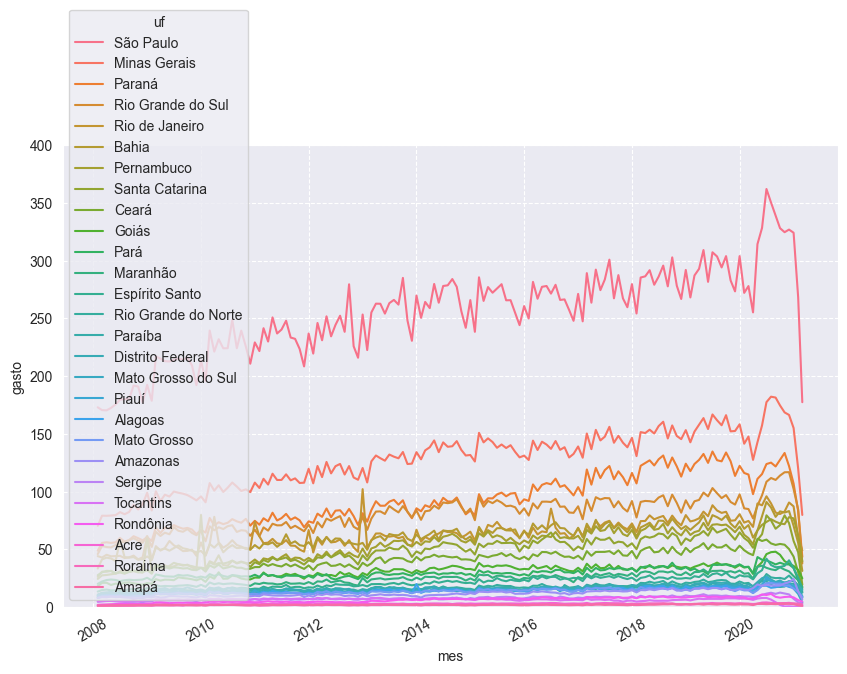

In [120]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0, 400)
plt.grid(linestyle="--")
plt.show()

### Desafios Aula 4 - Módulo2
***
***

#### Desafio 01 - Aula 4: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Podemos destacar além de *date* o método *timedelta* ou *timezone*.
- No caso da classe *timezone* apenas para destcara que ele permite definir vários *tempos* em fusos horários a partir de um determinado UTC (Coordinated Universal Time - Tempo universal Coordenado) que permite calcular qualquer zona horária do mundo. Mais em: https://docs.python.org/3/library/datetime.html#timezone-objects
- O *timedelta* permite calcular a dureção ou diferença entre duas datas ou tempos. Pode ser trabalhado em (days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0) realizando adições, subtrações, operrações booleanas e é especialmente útil em qualquer aplicação de relacionamento como calendários, aniversários, datas limite, prazos etc. Mais em https://docs.python.org/3/library/datetime.html#timedelta-objects
- Para a classe *date* que trabalhamos aqui, ela representa (year, month and day) de um calendário idealizado gregoriano que pode ser extendido pro passado e futuro, sabendo que January 1 of year 1 é chamado de  **DIA número 1**, e January 2 of year 1 é chamado de **DIA número 2** e assim por diante. Assim, podemos encontrar uma infinidade de métodos de utilização (https://docs.python.org/3/library/datetime.html#date-objects) que vemos abaixo, destacando: 

In [121]:
hoje = date.today()   # today retorna a data do dia
hoje

datetime.date(2021, 6, 18)

In [122]:
date.isoformat(hoje)    # isoformat retorna o padrão YYYY-MM-DD para qualquer data (yyyy, mm, dd)

'2021-06-18'

In [123]:
d = date(2002, 12, 31)
d.replace(day=26)    # podemos realizar trocas de datas com replace e operações com adiçoes e subtrações por exemplo

datetime.date(2002, 12, 26)

In [124]:
date(2015, 6, 11).isoweekday()     # Aqui a função isoweekday retorna o dia da semana onde segunda-deira é 1 até domingo que é 7. Neste caso em 11/jun/2015 foi Quinta feira 

4

In [125]:
date(2004, 2, 4).isocalendar()   # Retorna o ANO, SEMANA_ANUAL e DIA_DA_SEMANA (quarta-feira, 6ª semana de 2004)

(2004, 6, 3)

In [126]:
date(2002, 12, 4).ctime()    # Retorna DIA_DASEMANA, MES, DIA, hora:minuto:segundo, ANO

'Wed Dec  4 00:00:00 2002'

In [127]:
date.fromordinal(720160) # Retorna que o dia 730920 depois de 1. 1. 0001 (início do calendário gregoriano) é a data abaixo:

datetime.date(1972, 9, 24)

In [128]:
date(2011, 5, 23).strftime('%d/%m/%y')    # retona uma string explicitamente definida no seu formato. Neste caso (DD/MM/YY)

'23/05/11'

In [129]:
d.strftime('%A %d. %B %Y')    # retorna: DIA_DA_SEMANA_COMPLETO DIA. MES_COMPLETO ANO_COMPLETO . Uma lista dos formatos de código pode ser encontrada em https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

'Tuesday 31. December 2002'

In [130]:
'The {1} is {0:%d}, the {2} is {0:%B}.'.format(d, "day", "month")   # similar a strftime, permite usar o format para uma string complexa

'The day is 31, the month is December.'

#### Desafio 02 - Aula 4: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal_por_estado.

##### Revendo os DFs:

In [131]:
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


In [132]:
mensal_por_estado.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


##### Usando o PIVOT (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html?highlight=pivot#pandas.DataFrame.pivot) para reverter o MELT:

In [133]:
mensal_2 = mensal_aberto.pivot(index='mes', columns='uf', values='gasto')
mensal_2.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.13,1.94,0.77,24.41,4.64,172.96,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.32,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.90,1.96,0.88,27.48,5.02,170.56,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.31,2.14,0.90,27.81,5.27,170.34,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.09,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.46,5.34
2008-06-01,2.11,10.30,1.42,8.65,39.91,29.46,11.97,11.89,20.36,14.55,...,10.47,10.45,53.76,44.11,2.62,0.94,28.99,4.98,175.49,5.40


##### Reordenando por Total de gastos do maior para o menor: Transpor as colunas (estados) pata índice; criar coluna Total com a soma de cada Estado no DF transposto, depois ordenar(sort_values), dropar o "Total" e transpor novamente os Estados para Colunas:

In [134]:
mensal_2 = mensal_2.T

In [135]:
mensal_2.head()

mes,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01
uf,,,,,,,,,,,,,,,,,,,,,
Acre,1.74,2.06,2.06,2.23,2.11,2.03,1.89,2.08,2.23,2.12,...,3.91,4.05,3.66,3.47,3.27,3.39,3.71,3.01,2.27,1.14
Alagoas,8.11,9.21,10.47,9.84,10.30,9.39,9.26,9.23,9.46,9.58,...,18.40,18.52,16.71,17.20,18.11,18.86,17.46,16.50,12.79,8.18
Amapá,1.28,1.18,1.40,1.41,1.42,1.37,1.55,1.55,1.64,1.65,...,2.74,2.54,2.70,2.53,2.76,2.71,2.83,2.51,1.53,0.99
Amazonas,7.93,8.64,8.53,9.08,8.65,8.76,8.33,8.15,7.68,7.76,...,18.43,19.30,18.69,18.63,18.73,20.45,21.55,24.44,13.68,6.80
Bahia,33.41,41.32,42.83,42.09,39.91,57.66,43.25,42.85,43.33,40.95,...,78.68,91.01,86.23,78.14,82.91,81.87,83.13,70.33,55.54,31.31


In [136]:
mensal_2['Total'] = mensal_2.sum(axis=1)

In [137]:
mensal_2.head()

mes,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,Total
uf,,,,,,,,,,,,,,,,,,,,,
Acre,1.74,2.06,2.06,2.23,2.11,2.03,1.89,2.08,2.23,2.12,...,4.05,3.66,3.47,3.27,3.39,3.71,3.01,2.27,1.14,447.13
Alagoas,8.11,9.21,10.47,9.84,10.30,9.39,9.26,9.23,9.46,9.58,...,18.52,16.71,17.20,18.11,18.86,17.46,16.50,12.79,8.18,2215.27
Amapá,1.28,1.18,1.40,1.41,1.42,1.37,1.55,1.55,1.64,1.65,...,2.54,2.70,2.53,2.76,2.71,2.83,2.51,1.53,0.99,307.18
Amazonas,7.93,8.64,8.53,9.08,8.65,8.76,8.33,8.15,7.68,7.76,...,19.30,18.69,18.63,18.73,20.45,21.55,24.44,13.68,6.80,1897.36
Bahia,33.41,41.32,42.83,42.09,39.91,57.66,43.25,42.85,43.33,40.95,...,91.01,86.23,78.14,82.91,81.87,83.13,70.33,55.54,31.31,9700.28


In [138]:
mensal_2 = mensal_2.sort_values('Total', ascending=False)
mensal_2.head()

mes,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,Total
uf,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,...,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41,40216.09
Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,...,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78,20132.99
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48,14576.73
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80,12653.68
Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,...,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15,10060.45


In [139]:
mensal_2 = mensal_2.drop(columns=['Total'])

In [140]:
mensal_2.head()

mes,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01
uf,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,...,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,...,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,...,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


In [141]:
mensal_2 = mensal_2.T

In [142]:
mensal_2.head()

uf,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
mes,,,,,,,,,,,,,,,,,,,,,
2008-02-01,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,...,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


#### Desafio 03: Melhorar o gráfico lineplot da distribuição do gasto de todos os Estados:
- Escolha apenas alguns estados.
- Mude a palete de cores.
- Posicione a legenda de forma mais adequada.
- Adicione título principal e nos eixos x e y.

In [143]:
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


##### Será criado Gráfico com populações semelhantesa Bahia (14,9 Mi de Hab) +- 20% (vide DF populacao)

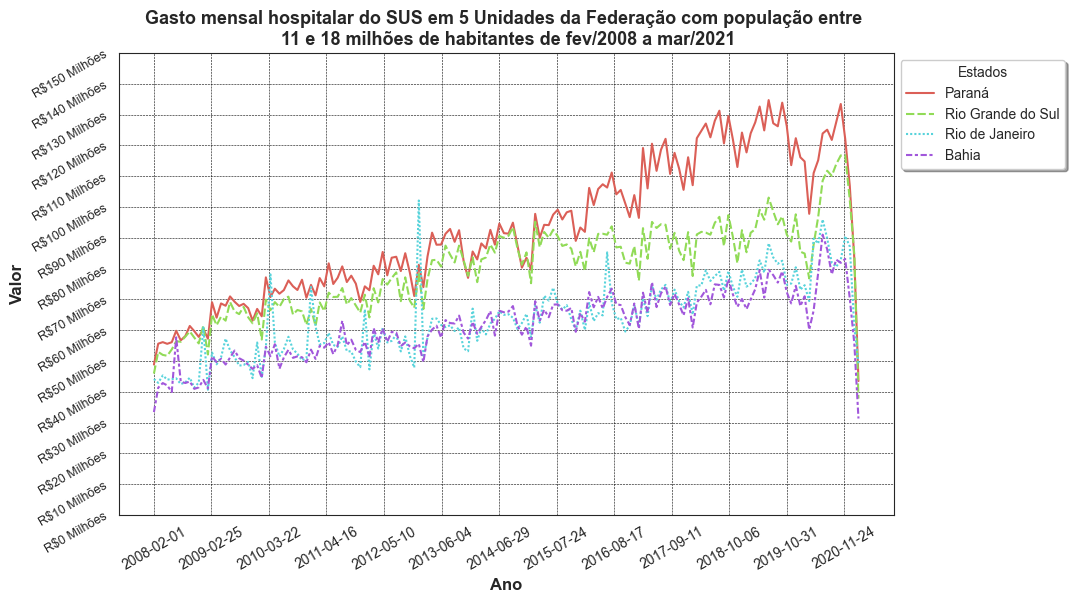

In [145]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal_aberto.query("uf in ['Rio de Janeiro', 'Bahia', 'Rio Grande do Sul', 'Paraná']"), x='mes', y='gasto', hue='uf', style='uf', palette='hls')   # poderia usar em vez de query o método ISIN que combina DF pandas com partes em comum, mas teria que criar um DF para os 4 Estados escolhidos
ax.set_title('Gasto mensal hospitalar do SUS em 5 Unidades da Federação com população entre \n 11 e 18 milhões de habitantes de fev/2008 a mar/2021', fontsize=13, weight=(700))
ax.set_ylabel('Valor', fontsize=12, weight=(700)) 
ax.set_xlabel('Ano', fontsize=12, weight=(700))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=390, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f} Milhões'))

ax = sns.set_style('white')

plt.locator_params(axis='y', nbins=16)
plt.legend(title='Estados', frameon=True, shadow=True, bbox_to_anchor=(1, 1))
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=9, rotation=30)
plt.ylim(0, 150)
plt.grid(linestyle="--", linewidth=0.4, color='black')
plt.show()